##Import Library dan Load Data

In [ ]:
!pip install xgboost

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://raw.githubusercontent.com/farrelrassya/teachingMLDL/main/01.%20Machine%20Learning/01.%20Week%201/Dataset/HeartDisease.csv"
df = pd.read_csv(url)

##Ubah Target menjadi Biner

In [ ]:
df['target'] = df['num'].apply(lambda x: 1 if x > 0 else 0)
df = df.drop(columns='num')

##Pisahkan Fitur dan Target

In [ ]:
X = df.drop('target', axis=1)
y = df['target']

##Split Data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##Train Random Forest

In [ ]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
y_proba_rf = rf.predict_proba(X_test)[:, 1]

##Train XGBoost

In [ ]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
y_proba_xgb = xgb.predict_proba(X_test)[:, 1]

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [11:09:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


##Evaluasi Model

In [ ]:
def evaluate_model(y_test, y_pred, y_proba):
    return {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred),
        'AUC': roc_auc_score(y_test, y_proba)
    }

rf_metrics = evaluate_model(y_test, y_pred_rf, y_proba_rf)
xgb_metrics = evaluate_model(y_test, y_pred_xgb, y_proba_xgb)

##Membandingkan Hasil

In [ ]:
comparison_df = pd.DataFrame([rf_metrics, xgb_metrics], index=['Random Forest', 'XGBoost'])
print("\nMetrik Evaluasi Model")
print(comparison_df)


Metrik Evaluasi Model
               Accuracy  Precision  Recall  F1 Score       AUC
Random Forest  0.885246   0.903226  0.8750  0.888889  0.935884
XGBoost        0.836066   0.866667  0.8125  0.838710  0.918103


##Kurva

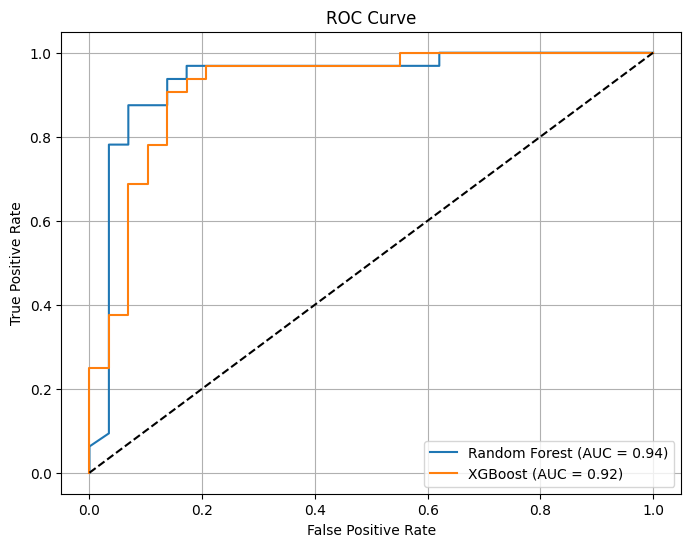

In [ ]:
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_proba_xgb)

plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label='Random Forest (AUC = {:.2f})'.format(rf_metrics['AUC']))
plt.plot(fpr_xgb, tpr_xgb, label='XGBoost (AUC = {:.2f})'.format(xgb_metrics['AUC']))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

#**Penjelasan Matematika**

1. **Accuracy**
   $$
   \text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}
   $$
   - Proporsi prediksi yang benar dibanding total data.

2. **Precision**
   $$
   \text{Precision} = \frac{TP}{TP + FP}
   $$
   - Seberapa akurat model saat memprediksi kelas positif.

3. **Recall**
   $$
   \text{Recall} = \frac{TP}{TP + FN}
   $$
   - Seberapa banyak kasus positif yang berhasil ditemukan.

4. **F1 Score**
   $$
   F1 = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}
   $$
   - Rata-rata harmonik dari Precision dan Recall.

5. **AUC - ROC**
   - AUC: Luas di bawah kurva ROC.
   - ROC: Grafik hubungan antara **TPR** dan **FPR**.
   $$
   TPR = \frac{TP}{TP + FN}, \quad FPR = \frac{FP}{FP + TN}
   $$
